# Práctica 2: Limpieza y análisis de datos
#### Tipología y ciclo de vida de los datos
### Marina Peña, Martín Sanchez

In [4]:
!pip3 install rpy2
%reload_ext rpy2.ipython                       

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [31]:
%%R
# librerias
install.packages("corrplot")

library(dplyr)
library(tidyverse) 
library(ggplot2)
library(corrplot)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/corrplot_0.92.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3765850 bytes (3.6 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

## 1.Descripción del dataset

Se dispone de un dataset que recoge alrededor de 1,5 millones de reseñas de cerveza de BeerAdvocates. BeerAdvocates es una asociación prostigiosa y de referencia para muchos productores de calificación de cervezas. Este juego de datos se encuentra disponible en el siguiente enlace: https://www.kaggle.com/datasets/rdoume/beerreviews

Este dataset es jugoso para aquellos amantes cerveceros, de cervezas artesanales que quieren ir mas allá y resolver cuestiones como:

+ ¿Es la graduación un factor determinante para que una cerveza sea mejor o peor?

+ ¿Cuáles de los factores (aroma, sabor, apariencia, paladar) son más importantes para determinar la calidad general de una cerveza?

+ ¿Qué cervecería produce las cervezas más fuertes por porcentaje de bebidas alcohólicas o ABV%?

+ ¿Cuales son las mejores cervezas para los usuarios? ¿Y las mejores cervecerías?

+ Si normalmente disfruto de una cerveza por su aroma y apariencia, ¿Qué estilo de cerveza debo probar?

## 2.Integración y selección de los datos

 Partimos de un único dataset que recopila datos de catas de cervezas como el tiempo de cata, puntuacion obtenida, puntuacion del olor, apariencia, gusto, paladar, el tipo de cerveza, graduacion alcoholica y ID de la cerveza.

 Nuestro objetivo es limpiar el dataset, normalizarlo si es necesario, y establecer visualizaciones que nos permitan obtener información sobre la relación que existe entre las características de las cervezas y su graduación alcoholica.



In [32]:
%%R
# Cargamos el juego de datos 
url<-"/content/drive/MyDrive/Web Scraping/beer_reviews.csv" 
data<-read.csv(url)

# Visualizamos todos los datos: 
str(data)

'data.frame':	1586614 obs. of  13 variables:
 $ brewery_id        : int  10325 10325 10325 10325 1075 1075 1075 1075 1075 1075 ...
 $ brewery_name      : chr  "Vecchio Birraio" "Vecchio Birraio" "Vecchio Birraio" "Vecchio Birraio" ...
 $ review_time       : int  1234817823 1235915097 1235916604 1234725145 1293735206 1325524659 1318991115 1306276018 1290454503 1285632924 ...
 $ review_overall    : num  1.5 3 3 3 4 3 3.5 3 4 4.5 ...
 $ review_aroma      : num  2 2.5 2.5 3 4.5 3.5 3.5 2.5 3 3.5 ...
 $ review_appearance : num  2.5 3 3 3.5 4 3.5 3.5 3.5 3.5 5 ...
 $ review_profilename: chr  "stcules" "stcules" "stcules" "stcules" ...
 $ beer_style        : chr  "Hefeweizen" "English Strong Ale" "Foreign / Export Stout" "German Pilsener" ...
 $ review_palate     : num  1.5 3 3 2.5 4 3 4 2 3.5 4 ...
 $ review_taste      : num  1.5 3 3 3 4.5 3.5 4 3.5 4 4 ...
 $ beer_name         : chr  "Sausa Weizen" "Red Moon" "Black Horse Black Beer" "Sausa Pils" ...
 $ beer_abv          : num  5 6.2 6.5 5 

 Tenemos 1586614 resultados pertenencientes a 13 características que son: id y  nombre cervecerías, tiempo de la cata, puntuación total, aroma, apariencia, profilename, estilo, paladar, sabor, nombre cerveza, graduación y id cerveza.

 Como nuestro objetivo principal es determinar la influencia de las características como aroma, sabor,.. de las cervezas las valizables referentes a los ID no nos son de mucha utilidad para el analisis por lo que optamos a eliminarlas para reducir el número de atributos y quedarnos con un dataset mas preciso para el estudio.

In [33]:
%%R 
# Eliminamos los atributos 'brewery_id' y 'beer_beerid'
 borrar= c('brewery_id','beer_beerid') 
 data=data[, !(names(data) %in% borrar)]
 head(data)

             brewery_name review_time review_overall review_aroma
1         Vecchio Birraio  1234817823            1.5          2.0
2         Vecchio Birraio  1235915097            3.0          2.5
3         Vecchio Birraio  1235916604            3.0          2.5
4         Vecchio Birraio  1234725145            3.0          3.0
5 Caldera Brewing Company  1293735206            4.0          4.5
6 Caldera Brewing Company  1325524659            3.0          3.5
  review_appearance review_profilename                     beer_style
1               2.5            stcules                     Hefeweizen
2               3.0            stcules             English Strong Ale
3               3.0            stcules         Foreign / Export Stout
4               3.5            stcules                German Pilsener
5               4.0     johnmichaelsen American Double / Imperial IPA
6               3.5            oline73           Herbed / Spiced Beer
  review_palate review_taste              beer_n

### 2.1 Variables categóricas

El dataset contiene información sobre el nombre de las cervecerías. Vemos que están registradas 5743.

In [34]:
%%R
n_distinct(data$brewery_name)

[1] 5743


Fueron 33388 usuarios los que votaron.

In [35]:
%%R
n_distinct(data$review_profilename)

[1] 33388


Puesto que el estilo de la cerveza es una categoría se convierte a factor. Se disponen datos de 104 tipos diferentes.

In [36]:
%%R
data$beer_style <- as.factor(data$beer_style)
n_distinct(data$beer_style)

[1] 104


Y la cantidad de cervezas diferentes analizadas es de 56857

In [37]:
%%R
n_distinct(data$beer_name)

[1] 56857


## 3.Limpieza de los datos
### 3.1 Ceros o elementos vacíos

  Vamos a ver si nuestro dataset contiene valores nulos o registros vacíos.

In [38]:
%%R
# Visualizamos elementos vacios o Na
colSums(is.na(data))

      brewery_name        review_time     review_overall       review_aroma 
                 0                  0                  0                  0 
 review_appearance review_profilename         beer_style      review_palate 
                 0                  0                  0                  0 
      review_taste          beer_name           beer_abv 
                 0                  0              67785 


  La única variable que presenta valores vacios es la graduacion alcoholica. Para decidir como tratar estos datos vamos a ver el porcentaje que representan en el conjunto total

In [39]:
%%R
sort(colMeans(is.na(data)), decreasing = TRUE)

          beer_abv       brewery_name        review_time     review_overall 
        0.04272306         0.00000000         0.00000000         0.00000000 
      review_aroma  review_appearance review_profilename         beer_style 
        0.00000000         0.00000000         0.00000000         0.00000000 
     review_palate       review_taste          beer_name 
        0.00000000         0.00000000         0.00000000 


 Al ser solo un 4,2% y teniendo un número tan elevado de registros, se eliminarán estos valores.

In [40]:
%%R
 data <- na.omit(data)
nrow(data)

[1] 1518829


  Tambien al haber tantos registros vamos a ver la existencia de filas duplicadas y procederemos a su eliminación.

In [41]:
%%R
# Numero filas con duplicados
cat('Numero filas con duplicados:', nrow(data), '\n')
# Numero filas sin duplicados
cat('Numero filas sin duplicados:', nrow(distinct(data)))

Numero filas con duplicados: 1518829 
Numero filas sin duplicados: 1518829

 Al tener el mismo numero de filas, no existen duplicados en el dataframe

### 3.2 Valores extremos
  
  Antes de ponernos a trabajar hemos visto mediante el comando sapply() que la  variable time es de tipo integrer y corresponde a un timestamp en formato unix, por lo que la convertiremos a numeric para poder trabajar con ella mas adelante.

  Además de reescalarla mediante la tecnica del escado decimal para normalizarla con el resto de variables.

In [42]:
%%R
#Comprobación
res = sapply(data,class)
knitr::kable(data.frame(variables=names(res),clase=as.vector(res)))



|variables          |clase     |
|:------------------|:---------|
|brewery_name       |character |
|review_time        |integer   |
|review_overall     |numeric   |
|review_aroma       |numeric   |
|review_appearance  |numeric   |
|review_profilename |character |
|beer_style         |factor    |
|review_palate      |numeric   |
|review_taste       |numeric   |
|beer_name          |character |
|beer_abv           |numeric   |


In [43]:
%%R
# Convertimos el tiempo a tipo numeric
data$review_time = as.numeric(data$review_time)
# Reescalamos
data$review_time<-data$review_time/10^9
str(data)

'data.frame':	1518829 obs. of  11 variables:
 $ brewery_name      : chr  "Vecchio Birraio" "Vecchio Birraio" "Vecchio Birraio" "Vecchio Birraio" ...
 $ review_time       : num  1.23 1.24 1.24 1.23 1.29 ...
 $ review_overall    : num  1.5 3 3 3 4 3 3.5 3 4 4.5 ...
 $ review_aroma      : num  2 2.5 2.5 3 4.5 3.5 3.5 2.5 3 3.5 ...
 $ review_appearance : num  2.5 3 3 3.5 4 3.5 3.5 3.5 3.5 5 ...
 $ review_profilename: chr  "stcules" "stcules" "stcules" "stcules" ...
 $ beer_style        : Factor w/ 104 levels "Altbier","American Adjunct Lager",..: 66 52 60 62 10 67 67 67 67 67 ...
 $ review_palate     : num  1.5 3 3 2.5 4 3 4 2 3.5 4 ...
 $ review_taste      : num  1.5 3 3 3 4.5 3.5 4 3.5 4 4 ...
 $ beer_name         : chr  "Sausa Weizen" "Red Moon" "Black Horse Black Beer" "Sausa Pils" ...
 $ beer_abv          : num  5 6.2 6.5 5 7.7 4.7 4.7 4.7 4.7 4.7 ...
 - attr(*, "na.action")= 'omit' Named int [1:67785] 274 431 604 734 799 928 945 961 962 963 ...
  ..- attr(*, "names")= chr [1:67785] "

## 4.Análisis de los datos





 

### 4.1 Selección de los grupos de datos

  Para poder obtener conclusiones sobre cómo afectan los parámetros catados sobre la graduación de las cervezas, procedemos a realizar una discretizacion de este atributo graduacion, creando una nueva variable categórica con 5 niveles: Sin alcohol, moderada, media,
fuerte o muy fuerte. A la cual llamaremos'rango graduacion'

 Usaremos el valor de la media, desviación estandar y los resultados de summary del atributo alcohol para establecer los rangos. 

 Así podremos ver cómo dentro de cada nivel las cervezas tienen mejores o peores características.

In [44]:
%%R
#Rango mediante la media y desviacion tipica de la variable beer_abv
s=sd(data$beer_abv)
print(s)
print(summary(data$beer_abv))

# Intervalo
data["rango_graduacion"] <- cut(data$beer_abv, breaks =
c(0,3.63,5.9,8.17,10.45,60), labels = c("Sin alcohol", "Moderada", "Media", "Fuerte","Muy fuerte"))

[1] 2.322526
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.010   5.200   6.500   7.042   8.500  57.700 


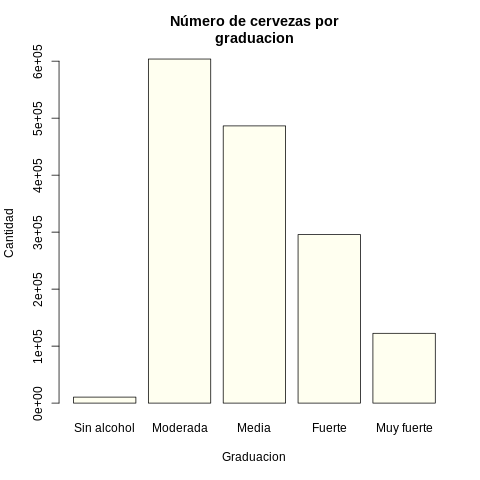

In [45]:
%%R
plot(data$`rango_graduacion`,main="Número de cervezas por
graduacion", xlab="Graduacion", ylab="Cantidad", col = "ivory")

  Vamos a ver que cantidad de distintas cervezas ofrece cada una de las cervecerías.

In [46]:
%%R
data %>% 
  group_by(brewery_name) %>%
  count(beer_style) %>%
  tally(sort = TRUE)

# A tibble: 5,156 × 2
   brewery_name                           n
   <chr>                              <int>
 1 Iron Hill Brewery & Restaurant        79
 2 Rock Bottom Restaurant & Brewery      79
 3 Goose Island Beer Co.                 66
 4 John Harvard's Brewery & Ale House    62
 5 Kuhnhenn Brewing Company              60
 6 Minneapolis Town Hall Brewery         60
 7 Fitger's Brewhouse                    56
 8 Church Brew Works                     54
 9 Portsmouth Brewery                    54
10 Sly Fox Brewing Company               54
# … with 5,146 more rows


 Observamos que la cervecería que mas tipos de cervezas tiene es Rock Bottom Restaurant & Brewery, por lo que para reducir el dataset crearemos uno nuevo con todas las cervezas pertenecientes a esa cervecería. 

 A este nuevo dataset eliminaremos las variables que no nos van a ser útiles en la determinación de cómo afectan las caracteristicas a la graduación de la cerveza, por lo que brewery_name, review_time y review_profilename serán eliminadas

In [47]:
%%R
#Seleccionamos
df_beer = data[data$brewery_name=='Rock Bottom Restaurant & Brewery',c(3:5,7:12)]

# Ordenamos las columnas
df_beer = df_beer %>% select(review_overall:review_appearance, review_palate:review_taste, beer_abv, beer_style, beer_name, rango_graduacion)
str(df_beer)


'data.frame':	1474 obs. of  9 variables:
 $ review_overall   : num  4.5 3.5 4 4.5 3 3.5 4 4.5 2 3.5 ...
 $ review_aroma     : num  4 3.5 4 4.5 4 2.5 4.5 4.5 1.5 2.5 ...
 $ review_appearance: num  4 3.5 4 4.5 3.5 4 4 3.5 1.5 3.5 ...
 $ review_palate    : num  4 4 4 4 2.5 3.5 4 4.5 1.5 3 ...
 $ review_taste     : num  4 4 4 4 3 3.5 4 5 1 3.5 ...
 $ beer_abv         : num  6.2 6 6.1 6.1 6.1 6.1 6.1 6.1 4.4 5.5 ...
 $ beer_style       : Factor w/ 104 levels "Altbier","American Adjunct Lager",..: 33 18 13 13 13 13 13 13 77 69 ...
 $ beer_name        : chr  "Anniversary Ale XII" "Spout Run Porter" "Double Barrel IPA" "Double Barrel IPA" ...
 $ rango_graduacion : Factor w/ 5 levels "Sin alcohol",..: 3 3 3 3 3 3 3 3 2 2 ...


  Finalmente trabajaremos con un dataframe con 2476 observaciones de 9 variables. Ahora el propósito es realizar diversas pruebas estadísticas;
  Empezaremos aplicando correlacion entre variables para ver la influencia que tienen unas con otras.
   Mediante técnicas de gregresión simples y múltiples podremos evaluar como afecta el sabor, aroma... a la graduación y a la nota total.
  Y aplicar un contraste de hipótesis para ver si la nota total media de las cervezas con mayor graduación es igual a las de menor.

### 4.2 Normalidad y homogeneidad de la varianza.

Para revisar si las variables pueden ser candidatas a la normalización miramos las graficas de quantile-quantile
plot y el histograma

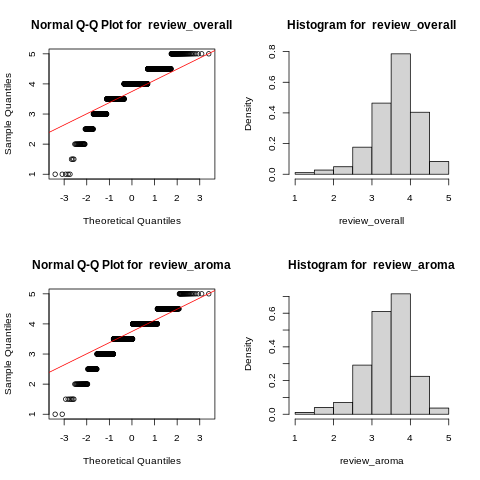

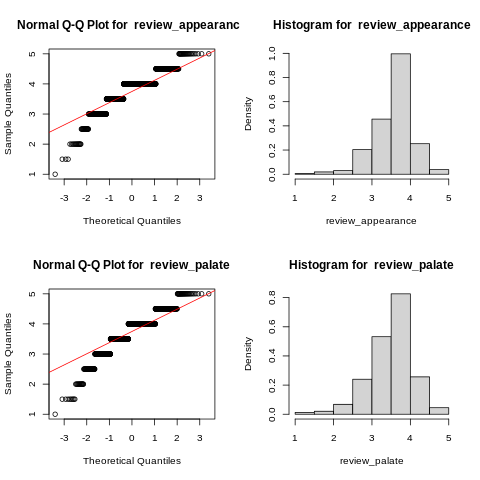

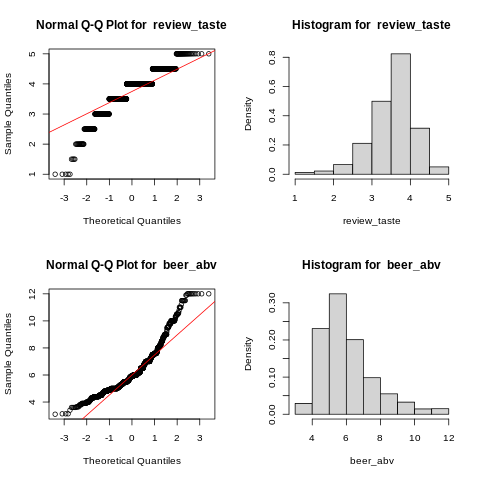

In [48]:
%%R
par(mfrow=c(2,2))
for(i in 1:ncol(df_beer)) {
    if (is.numeric(df_beer[,i])){
        qqnorm(df_beer[,i],main = paste("Normal Q-Q Plot for ",colnames(df_beer)[i]))
        qqline(df_beer[,i],col="red")
        hist(df_beer[,i],
             main=paste("Histogram for ", colnames(df_beer)[i]),
             xlab=colnames(df_beer)[i], freq = FALSE)
        }
}

  A excepción de la graduación cuyos residuos se alejan demasiado de la línea de quantiles el resto de variables son candidatas a la normalización si es necesario.

  Para revisar si las variables siguen una distribución normal aplicaremos el test de Shapiro Wilk en cada variables numérica.

In [49]:
%%R
shapiro.test(df_beer$review_overall)


	Shapiro-Wilk normality test

data:  df_beer$review_overall
W = 0.89931, p-value < 2.2e-16



In [50]:
%%R
shapiro.test(df_beer$review_aroma)


	Shapiro-Wilk normality test

data:  df_beer$review_aroma
W = 0.91436, p-value < 2.2e-16



In [51]:
%%R
shapiro.test(df_beer$review_appearance)


	Shapiro-Wilk normality test

data:  df_beer$review_appearance
W = 0.86956, p-value < 2.2e-16



In [52]:
%%R
shapiro.test(df_beer$review_palate)


	Shapiro-Wilk normality test

data:  df_beer$review_palate
W = 0.9027, p-value < 2.2e-16



In [53]:
%%R
shapiro.test(df_beer$review_taste)


	Shapiro-Wilk normality test

data:  df_beer$review_taste
W = 0.89634, p-value < 2.2e-16



  Comprobamos como ninguna las variables numéricas sigue una distribución normal ya que el test nos devuelve para todas ellas un p_value < 0.05. Por lo que rechazamos la hipotesis nula de normalidad.

  Sin embargo que no sea normal no quiere decir que no pueda ser normalizable, ya que segun el teorema del limite central al tener mas de 30 elementos en las observaciones podemos aproximar la función de densidad como una distribución normal de media 0 y desviación estandard 1. En este caso, puesto que ya se encuentra comprendido en una escala común de 1 a 5 no se realizará la normalización.

### 4.3. Aplicación de pruebas estadísticas

  En primer lugar vamos a estudiar la correlación entre las varibales

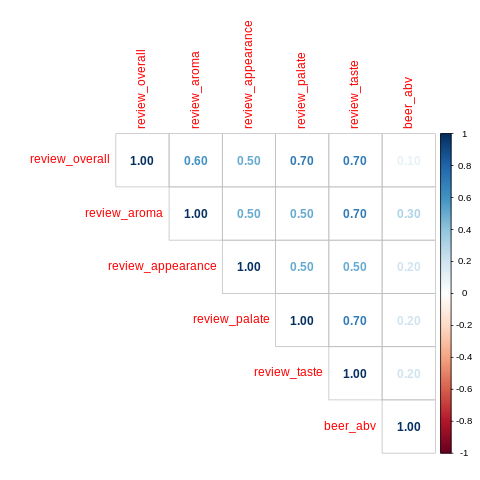

In [54]:
%%R
correlation_matrix=df_beer[,1:6]

# Matriz de correlación
correlacion<-round(cor(correlation_matrix, method ="pearson"), 1)
corrplot(correlacion, method="number", type="upper", main= '')

  Todas presentan entre si una correlación positiva, este resultado es de esperar ya que si una cerveza obtuvo una puntuacion general elevada es porque en el resto de caractarísticas tendria puntuaciones altas. 
  La matriz de correlación anterior nos muestra como la variable más independiente en relacion con el resto es la apariencia de la cerveza, mientras que la mas correlacionada con el resto en general es el sabor, sobretodo es la mas influyente en la puntuación general.
  Si nos fijamos en la fila de graduación vemos como ninguna de las características anteriores esta correlacionada con el grado de alcohol de la cerveza.

  Vamos a realizar una regresión lineal para ver la influencia de las características sobre la puntuación total y otra sobre la graduación

In [55]:
%%R
# Definimos el modelo de regresion lineal multiple para la puntuación general
reg_model = lm(review_overall ~ review_aroma + review_appearance + review_palate + review_taste, data = df_beer)
summary(reg_model)


Call:
lm(formula = review_overall ~ review_aroma + review_appearance + 
    review_palate + review_taste, data = df_beer)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.07104 -0.21404 -0.00944  0.25031  1.24678 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.46181    0.08602   5.369 9.21e-08 ***
review_aroma       0.07788    0.02421   3.218  0.00132 ** 
review_appearance  0.07129    0.02442   2.920  0.00356 ** 
review_palate      0.28601    0.02558  11.181  < 2e-16 ***
review_taste       0.46712    0.02788  16.755  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3958 on 1469 degrees of freedom
Multiple R-squared:  0.579,	Adjusted R-squared:  0.5779 
F-statistic: 505.1 on 4 and 1469 DF,  p-value: < 2.2e-16



  Para todas las variables el p_value es inferior a 0.05, esto significa que que el conjunto de variables explicativas contribuyen significativamente en la nota global.

   Vemos entre ellas, las mas influyentes son el sabor y el paladar. Si nos fijamos en los valores estimados de la ecuacion. Vemos como dentro de los atributos paladar y sabor, gana sabor ya que este hace incrementar la puntuacion total un 0.46%, mientras que paladar lo hace con un 0.28%.

   El valor del estadístico R2= 0.579, cercano a 1, sabemos que los datos se ajustan bien a la regresión.

In [56]:
%%R
# Definimos el modelo de regresion lineal multiple para la graduacion

reg_model2 = lm(beer_abv ~ review_aroma + review_appearance + review_palate + review_taste, data = df_beer)
summary(reg_model2)


Call:
lm(formula = beer_abv ~ review_aroma + review_appearance + review_palate + 
    review_taste, data = df_beer)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3781 -1.0228 -0.3662  0.6835  7.3604 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.84428    0.32956   8.630  < 2e-16 ***
review_aroma       0.67071    0.09274   7.232 7.61e-13 ***
review_appearance  0.17075    0.09355   1.825   0.0682 .  
review_palate      0.09075    0.09800   0.926   0.3546    
review_taste      -0.02377    0.10681  -0.223   0.8239    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.516 on 1469 degrees of freedom
Multiple R-squared:  0.08844,	Adjusted R-squared:  0.08596 
F-statistic: 35.63 on 4 and 1469 DF,  p-value: < 2.2e-16



  En cuanto a la graduación por el valor del p_value la única variable significativa es el aroma, sin embargo el estadístico R2 nos devuelve un valor muy muy bajo, solo explica un 4% de la varianza por lo que este modelo no es un buen ajuste para los datos.

De las cervezas anteriores vamos a seleccionar las 6 que mejor aroma y apariencia tienen, para responder a nuestra pregunta de qué estilo de cervezas elegiríamos si esperamos un gran arona y apariencia.

In [57]:
%%R
dd = data[order(c(data$review_aroma, data$review_appearance),decreasing = TRUE),]

head(unique(dd$beer_style))
  

[1] Herbed / Spiced Beer    Rauchbier               American Pale Ale (APA)
[4] Russian Imperial Stout  American IPA            American Porter        
104 Levels: Altbier American Adjunct Lager ... Witbier


  Hemos visto como la correlación nos indicaba que la graduación y el resto de características de la cerveza eran idependientes, así como con la nota general. Por lo que a priori podemos pensar que como la graduación no importa la nota promedia de las cervezas de alta graduación y baja sería mas o menos igual.
  
  Para comprobarlo realizaremos un contraste de hipétesis, siendo nuestra pregunta nula:
  Ho = La nota promedio de las cervezas suaves (Sin alcohol,Moderado y Medio)  es igual a las de graduación fuertes (Fuertes y Muy fuertes). 

In [58]:
%%R
# Creamos dos variables para ordenar las cervezas por graduacion
G0 = df_beer$review_overall[df_beer$rango_graduacion == c('Sin alcohol', 'Media','Moderada')]
G4 = df_beer$review_overall[df_beer$rango_graduacion == c('Muy fuerte','Fuerte')]

In [59]:
%%R
ttest.varneq=t.test(G0,G4,alternative="two.side",var.equal=FALSE,conf.level=0.95)
ttest.varneq


	Welch Two Sample t-test

data:  G0 and G4
t = -0.23999, df = 104.09, p-value = 0.8108
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1846743  0.1448004
sample estimates:
mean of x mean of y 
 3.876404  3.896341 



 Comoprobamos como el p_value es > 0.05 por lo que no rechazamos la hipótesis nula y verificamos que no importa el grado de la cerveza para que obtenga una buena puntuación. No se rechaza Ho.
 Vamos a comprobarlo con los extremos de la graduación

In [60]:
%%R
G0 = df_beer$review_overall[df_beer$rango_graduacion == c('Sin alcohol')]
G4 = df_beer$review_overall[df_beer$rango_graduacion == c('Muy fuerte')]

ttest.varneq=t.test(G0,G4,alternative="two.side",var.equal=FALSE,conf.level=0.95)
ttest.varneq


	Welch Two Sample t-test

data:  G0 and G4
t = -0.73019, df = 26.052, p-value = 0.4718
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5828159  0.2772603
sample estimates:
mean of x mean of y 
 3.750000  3.902778 



  Volvemos a obtener un p_value>0.05 por lo que confirmamos que ambas notas globales son iguales independientemente de la graduación.
  Por lo que podemos dar respuesta a la primera pregunta planteada y confirmar que la graduación no es un factor determinante en la calidad de una cerveza.

# 5. Análisis descriptivo y visualizaciones



  Usando el dataset inicial podemos resolver algunas de las cuestiones iniciales como: ¿Qué cervecería produce la cerveza con mayor graduación de alcohol? Para ello reducimos el set de datos para incluir solo las variables que nos interesan y eliminamos los valores duplicados para solo tener un valor por cerveza. Vemos que la cervería que produce las cervezas con mayor concentración de alcohol es Schorschbräu, con cervezas de 57.7º y 43.0º.

In [61]:
%%R
d = distinct(data[, c('brewery_name', 'beer_name', 'beer_abv' )])
d %>% arrange(desc(beer_abv)) %>% head(10)

                                                 brewery_name
1                                                Schorschbräu
2                                                Schorschbräu
3                                                     BrewDog
4                                                Schorschbräu
5                                         De Struise Brouwers
6                                                     BrewDog
7                                                Schorschbräu
8  Hair of the Dog Brewing Company / Brewery and Tasting Room
9                                                     BrewDog
10                         Boston Beer Company (Samuel Adams)
                       beer_name beer_abv
1  Schorschbräu Schorschbock 57%    57.70
2  Schorschbräu Schorschbock 43%    43.00
3             Sink The Bismarck!    41.00
4  Schorschbräu Schorschbock 40%    39.44
5     Black Damnation VI - Messy    39.00
6       Tactical Nuclear Penguin    32.00
7  Schorschbräu Schorsch

Estas cervezas de alta graduación son raras y la mitad de las cervezas (Cuantiles 25 y 75) se encuentran en un rango de entre 5º y 7.2º

   0%   25%   50%   75%  100% 
 0.01  5.00  5.70  7.20 57.70 


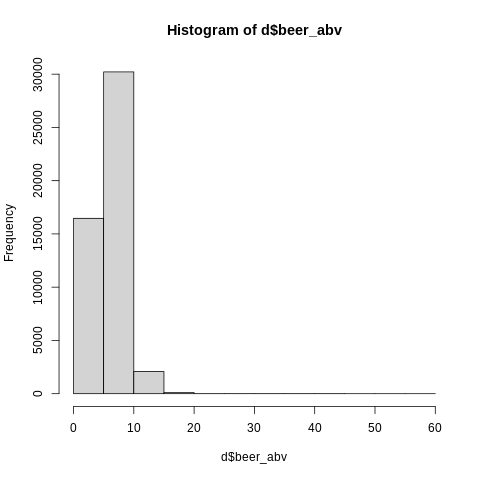

In [62]:
%%R
hist(d$beer_abv)
quantile(d$beer_abv)

 
Para saber la mejor cervecería, utilizaremos la media de las puntuaciones. Eliminaremos las cervezas con menos de 30 reviews para cumplir con el teorema del límite central. La mejor cervecería es The Alchemist con una valoración media de 4.58

In [63]:
%%R
d = data[, c('brewery_name', 'review_overall' )]
d = (d %>% group_by(brewery_name) %>% summarise(Mean = mean(review_overall), N = n()))
d <- d[(d$N > 30),]
d %>% arrange(desc(Mean)) %>% head(10)

# A tibble: 10 × 3
   brewery_name                                                Mean     N
   <chr>                                                      <dbl> <int>
 1 The Alchemist                                               4.58   527
 2 Brouwerij Westvleteren (Sint-Sixtusabdij van Westvleteren)  4.54  2378
 3 Russian River Brewing Company                               4.37 11295
 4 Närke Kulturbryggeri AB                                     4.36   209
 5 Badische Staatsbrauerei Rothaus AG                          4.36   126
 6 De Cam Geuzestekerij                                        4.32   159
 7 Live Oak Brewing Company                                    4.32   576
 8 Hill Farmstead Brewery                                      4.30  1518
 9 Kern River Brewing Company                                  4.30   903
10 Brouwerij Drie Fonteinen                                    4.29  1668


Y la distribución tiene la siguiente forma.

      0%      25%      50%      75%     100% 
1.614183 3.478780 3.724843 3.900000 4.582543 


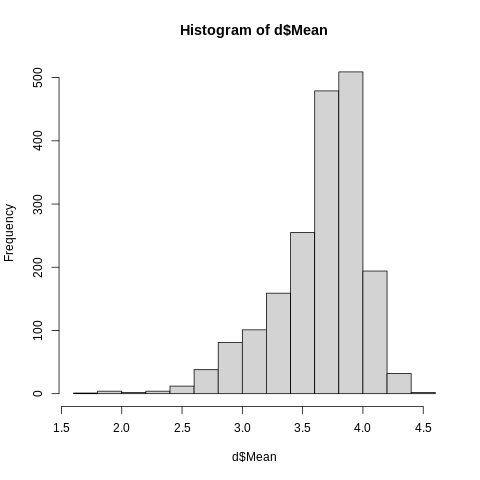

In [64]:
%%R
hist(d$Mean)
quantile(d$Mean)

Utilizando la misma estrategia, podemos evaluar cual es la mejor cerveza. Esta es la Dirty Horse con una nota media de 4.82 ptos.

In [65]:
%%R
d = data[, c('beer_name', 'brewery_name', 'review_overall' )]
d = (d %>% group_by(beer_name) %>% summarise(Mean = mean(review_overall), N = n()))
d <- d[(d$N > 30),]
d %>% arrange(desc(Mean)) %>% head(10)

# A tibble: 10 × 3
   beer_name                                       Mean     N
   <chr>                                          <dbl> <int>
 1 Dirty Horse                                     4.82    39
 2 Southampton Berliner Weisse                     4.77    41
 3 Armand'4 Oude Geuze Lente (Spring)              4.73    65
 4 Hoppy Birthday                                  4.68    65
 5 Armand'4 Oude Geuze Zomer (Summer)              4.64    45
 6 Yellow Bus                                      4.64    46
 7 Geuze Cuvée J&J (Joost En Jessie) Blauw (Blue)  4.63    71
 8 Citra DIPA                                      4.63   252
 9 Cantillon Blåbær Lambik                         4.63   156
10 Veritas 004                                     4.63    83


## 6. Conclusiones

  Finalmente podemos dar respuesta a las preguntas iniciales de la práctica.

-  Hemos visto que el sabor es el atributo más influyente a la hora de obtener la nota global de la  cerveza.

- Que los atributos que califican las cervezas no mantienen correlación con su graduación y por ello la nota media global de las cervezas con baja graduación es igual a las de alta graduación.

- La cervería que produce las cervezas con mayor concentración de alcohol es Schorschbräu, con cervezas de 57.7º y 43.0º.
 
- La cervecería con mejores reviews es The Alchemist con una valoración media de 4.58 ptos y la mejor cerveza por los usuarios es la Dirty Horse con una nota media de 4.82 ptos.

- Si lo que realmente nos gusta es beber cerveza por su aroma y sabor los 6 estilos de cerveza que deberíamos tomar son:
Herbed / Spiced Beer, Rauchbier,
American Pale Ale (APA), Russian Imperial Stout, American IPA o American Porter.

## 7. Exportación del código en R y de los datos producidos

El código en R esta incluido en este fichero con extensión rmd y tambien se puede descargar en GitHub desde
la siguiente dirección:

https://github.com/martinsanc/data_cleaning/blob/main/PRA2.ipynb

Los datos de salida se exportan mediante el siguiente comando y pueden ser descargados desde en GitHub
desde la siguiente dirección:



In [66]:
%%R
write.csv(data, file = "/content/drive/MyDrive/Web Scraping/beer_reviews_out.csv")